In [ ]:
import numpy as np

class HopfieldNetwork:

  def __init__(self, num_neurons):
    self.num_neurons = num_neurons
    self.states = np.random.choice([-1,1], size=num_neurons)
    self.biases = np.random.uniform(-1,1,size=num_neurons)
    self.weights = np.random.uniform(-1,1,size=(num_neurons,num_neurons))
    self.weights = 0.5 *(self.weights + self.weights.T)
    np.fill_diagonal(self.weights, 0)

  def update_state(self):
    neuron_index = np.random.randint(0, self.num_neurons)
    activation = np.dot(self.weights[neuron_index], self.states) - self.biases[neuron_index]
    self.states[neuron_index] = np.sign(activation)

  def compute_energy(self):
      W_s = np.dot(self.weights, self.states)
      energy = np.dot(self.states,W_s)
      return -0.5 * energy - np.dot(self.biases , self.states)

  def run_until_convergence(self, max_steps=10000, update_interval=100):
        energy_list = []
        for _ in range(max_steps):
            self.update_state()
            if _ % update_interval == 0:
                energy = self.compute_energy()
                energy_list.append(energy)
            if len(energy_list) > 1 and energy_list[-1] > energy_list[-2]:
                break
        return energy_list

  def set_state(self, new_states):
      if len(new_states) == self.num_neurons:
          self.states = np.array(new_states)
      else:
          print("Error: State size mismatch!")

  def get_state(self):
      return self.states

if __name__ == "__main__":
  seed = 10
  np.random.seed(seed)
  num_neurons = 10
  hopfield_net = HopfieldNetwork(num_neurons)
  print("Initial State:", hopfield_net.get_state())
  while not hopfield_net.run_until_convergence():
      hopfield_net.update_state()

  print("Converged State:", hopfield_net.get_state())
  print("Energy:", hopfield_net.compute_energy())

Initial State: [ 1  1 -1  1 -1  1  1 -1  1  1]
Converged State: [ 1  1 -1  1  1 -1 -1  1 -1 -1]
Energy: 1.480824947024435


*energy goes down during run*

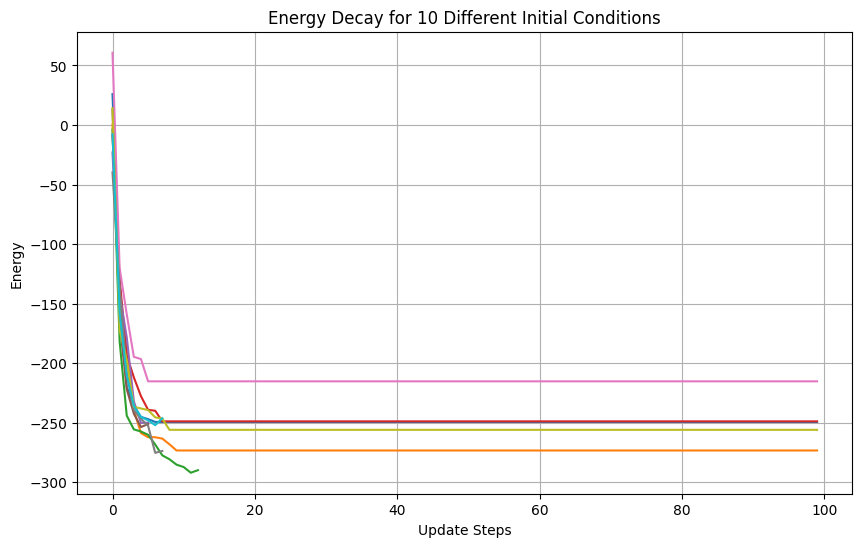

In [ ]:
import matplotlib.pyplot as plt
seed = 10
np.random.seed(seed)
num_neurons = 100
num_initial_conditions = 10
max_steps = 10000
update_interval = 100

plt.figure(figsize=(10, 6))
for _ in range(num_initial_conditions):
    hopfield_net = HopfieldNetwork(num_neurons)
    energy_list = hopfield_net.run_until_convergence(max_steps, update_interval)
    plt.plot(range(len(energy_list)), energy_list)

plt.xlabel('Update Steps')
plt.ylabel('Energy')
plt.title('Energy Decay for 10 Different Initial Conditions')
plt.grid(True)
plt.show()


***Training***

In [ ]:
def train(patterns, hopfield_net):
  num_patterns = len(patterns)
  pattern_length = len(patterns[0])

  for pattern in patterns:
    pattern = np.array(pattern)
    weight_update = np.outer(pattern, pattern) / pattern_length
    np.fill_diagonal(weight_update, 0)
    hopfield_net.weights += weight_update
  return hopfield_net.weights

def retrieve_pattern(hopfield_net, input_pattern, max_steps=1000):
        hopfield_net.states = input_pattern
        for _ in range(max_steps):
            hopfield_net.update_state()
        return hopfield_net.states

In [ ]:
seed = 10
np.random.seed(seed)
binary_array = np.random.choice([-1, 1], size=(10, 10))
hopfield_net = HopfieldNetwork(binary_array.size)
hopfield_net.weights

array([[ 0.        ,  0.47664133, -0.36987001, ...,  0.21626915,
        -0.51249279, -0.13594223],
       [ 0.47664133,  0.        ,  0.57612314, ...,  0.42728245,
         0.36527988,  0.02979724],
       [-0.36987001,  0.57612314,  0.        , ..., -0.41976577,
        -0.00837506,  0.41856821],
       ...,
       [ 0.21626915,  0.42728245, -0.41976577, ...,  0.        ,
         0.25333418,  0.43944057],
       [-0.51249279,  0.36527988, -0.00837506, ...,  0.25333418,
         0.        ,  0.14283298],
       [-0.13594223,  0.02979724,  0.41856821, ...,  0.43944057,
         0.14283298,  0.        ]])

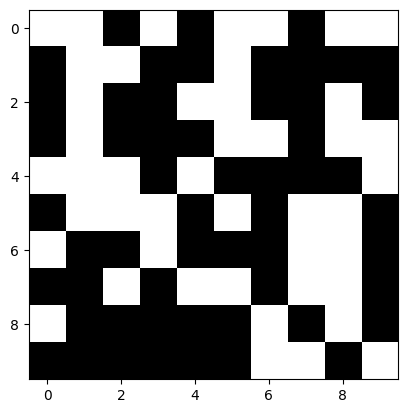

In [ ]:
plt.imshow(binary_array, cmap='gray', vmin=-1, vmax=1)
plt.show()

In [ ]:
train([binary_array.flatten()],hopfield_net)

array([[ 0.        ,  0.48664133, -0.37987001, ...,  0.22626915,
        -0.52249279, -0.12594223],
       [ 0.48664133,  0.        ,  0.56612314, ...,  0.43728245,
         0.35527988,  0.03979724],
       [-0.37987001,  0.56612314,  0.        , ..., -0.42976577,
         0.00162494,  0.40856821],
       ...,
       [ 0.22626915,  0.43728245, -0.42976577, ...,  0.        ,
         0.24333418,  0.44944057],
       [-0.52249279,  0.35527988,  0.00162494, ...,  0.24333418,
         0.        ,  0.13283298],
       [-0.12594223,  0.03979724,  0.40856821, ...,  0.44944057,
         0.13283298,  0.        ]])

In [ ]:
binary_array[:, :binary_array.shape[1] // 4] = -1

In [ ]:
seed = 10
np.random.seed(seed)
retrieved_image = retrieve_pattern(hopfield_net,binary_array.flatten())
retrieved_image = retrieved_image.reshape(binary_array.shape)
retrieved_image

array([[ 1, -1,  1,  1,  1, -1,  1,  1, -1,  1],
       [ 1,  1,  1,  1,  1,  1, -1,  1, -1, -1],
       [ 1,  1,  1, -1,  1,  1, -1, -1, -1,  1],
       [-1,  1, -1, -1, -1,  1, -1, -1,  1, -1],
       [-1, -1,  1, -1, -1,  1,  1, -1,  1,  1],
       [ 1, -1,  1,  1,  1,  1, -1,  1,  1, -1],
       [-1, -1,  1,  1,  1, -1, -1,  1, -1, -1],
       [ 1, -1, -1, -1,  1,  1, -1,  1,  1, -1],
       [ 1, -1, -1,  1,  1, -1,  1,  1,  1,  1],
       [ 1, -1,  1,  1,  1,  1, -1,  1, -1,  1]])

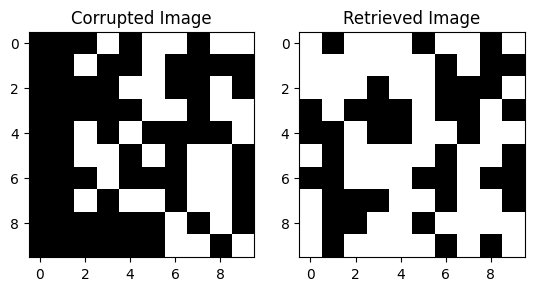

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(binary_array, cmap='gray', vmin=-1, vmax=1)
plt.title('Corrupted Image')
plt.subplot(1, 2, 2)
plt.imshow(retrieved_image, cmap='gray', vmin=-1, vmax=1)
plt.title('Retrieved Image')
plt.show()